# **Problem Statement**  
## **14. Plot learning curves for underfitting and overfitting models.**

Plot learning curves to identify underfitting and overfitting behavior in machine learning models by visualizing training error vs validation error as the training set size increases.

### Constraints & Example Inputs/Outputs

### Constraints
- Use a supervised learning dataset
- Models must differ in complexity
- Use:
    - Simple model → underfitting
    - Complex model → overfitting
- Learning curve = error vs training size

### Example Input:
- Dataset: Synthetic regression data
- Models:
    - Linear Regression (low complexity)
    - Polynomial Regression (high complexity)```

### Expected Output:
- Underfitting:
    - High training error
    - High validation error
- Overfitting:
    - Low training error
    - High validation error

### Solution Approach

### What Are Learning Curves?
Learning curves plot:
- Training error
- Validation error
vs
- Number of training samples

### How to Interpret Them

```python
| Scenario     | Training Error | Validation Error |
| ------------ | -------------- | ---------------- |
| Underfitting | High           | High             |
| Overfitting  | Low            | High             |
| Good Fit     | Low            | Low              |
```

### Strategy
1. Generate dataset
2. Train model with increasing data sizes
3. Compute train & validation error
4. Plot curves
5. Compare model behaviors

### Solution Code

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Helper Function to Plot Learning Curve
def plot_learning_curve(model, X, y, title):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    val_errors = []

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    for size in train_sizes:
        subset_size = int(len(X_train) * size)
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        model.fit(X_subset, y_subset)

        train_pred = model.predict(X_subset)
        val_pred = model.predict(X_val)

        train_errors.append(mean_squared_error(y_subset, train_pred))
        val_errors.append(mean_squared_error(y_val, val_pred))

    plt.plot(train_sizes, train_errors, label="Training Error")
    plt.plot(train_sizes, val_errors, label="Validation Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


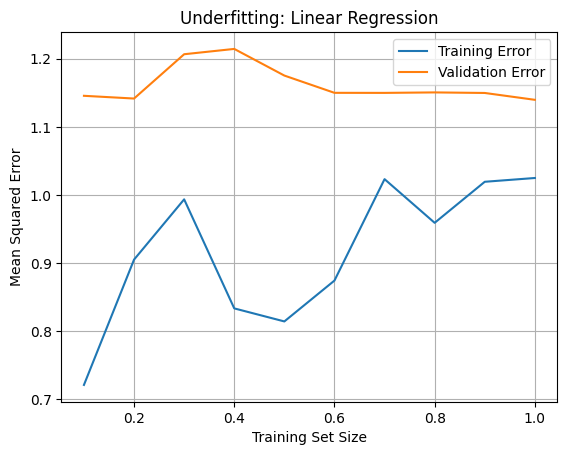

In [3]:
# Approach1: Underfitting Model (Linear Regression)
np.random.seed(42)
X = np.random.rand(200, 1)
y = 4 * X**2 + np.random.randn(200, 1)

linear_model = LinearRegression()
plot_learning_curve(linear_model, X, y, "Underfitting: Linear Regression")


### Alternative Solution

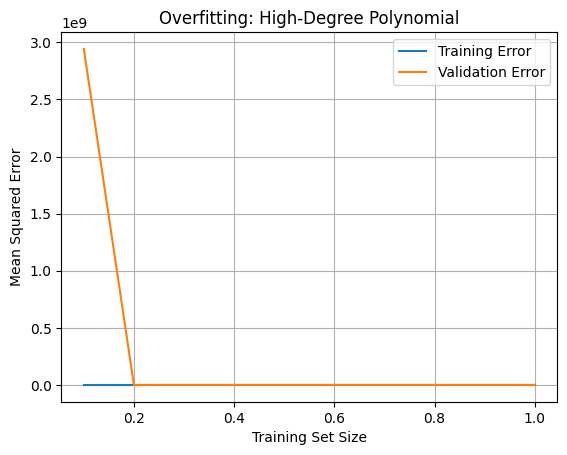

In [4]:
# Approach2: Overfitting Model (High-Degree Polynomial)
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
plot_learning_curve(poly_model, X_poly, y, "Overfitting: High-Degree Polynomial")


### Alternative Approaches

Other Ways to Analyze Under/Overfitting
- Bias–Variance tradeoff analysis
- Cross-validation curves
- Regularization paths (L1/L2)
- Validation curves (hyperparameter tuning)

### Test Case

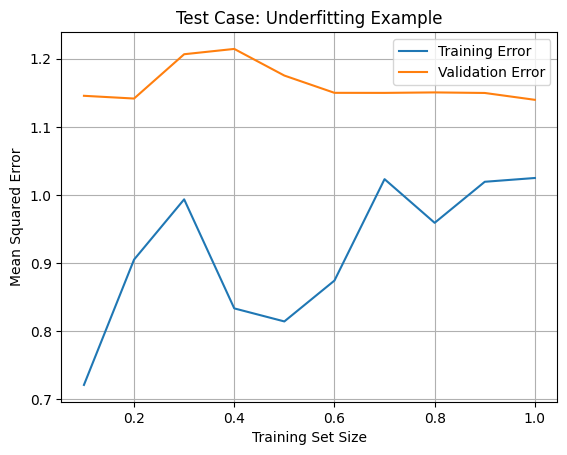

In [5]:
# Test Case 1: Clear Underfitting

plot_learning_curve(
    LinearRegression(),
    X,
    y,
    "Test Case: Underfitting Example"
)


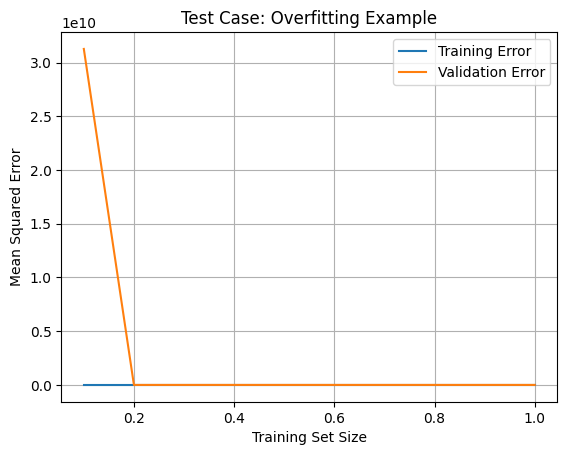

In [6]:
# Test Case 2: Clear Overfitting

plot_learning_curve(
    LinearRegression(),
    PolynomialFeatures(degree=20).fit_transform(X),
    y,
    "Test Case: Overfitting Example"
)


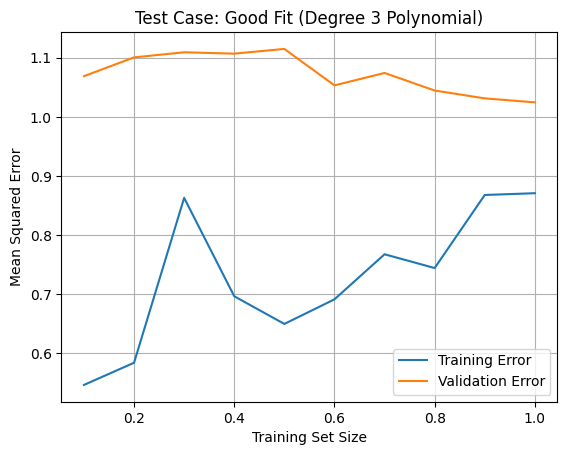

In [7]:
# Test Case 3: Balanced Model (Good Fit)

plot_learning_curve(
    LinearRegression(),
    PolynomialFeatures(degree=3).fit_transform(X),
    y,
    "Test Case: Good Fit (Degree 3 Polynomial)"
)


### Expected Outputs

✔ Underfitting Plot
- Training & validation errors high
- Lines close together

✔ Overfitting Plot
- Training error near zero
- Validation error much higher

✔ Good Fit Plot
- Errors converge
- Low generalization gap

## Complexity Analysis

### Time Complexity
- Training: O(n * model_complexity)
- Plotting: O(n)

### Space Complexity
- Dataset storage: O(n)
- Error arrays: O(n)

#### Thank You!!